## Dimensionality Reduction

### Principal Component Analysis
Out of the $m$ independent variables, PCA selects $n < m$ new independent variables that explain the most variance **regardless of the dependent variable.** 
Since dependent variable is not considered, PCA is an unsupervised model. 

# New Section

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Wine.csv is downloadable from Kaggle, 
# https://www.kaggle.com/sgus1318/winedata


df = pd.read_csv('winequality-red.csv', delimiter = ";") # silakan diganti
X = df.iloc[:, :-1].values   # Using 1:2 as indices will give us np array of dim (10, 1)
y = df.iloc[:, -1].values

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
# Split in training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [22]:
# Always scale data for good results on PCA
from sklearn.preprocessing import StandardScaler
X_sca = StandardScaler()
X_train = X_sca.fit_transform(X_train)
X_test = X_sca.transform(X_test)

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit_transform(X_train)
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[0.28199502 0.17637118 0.14454145 0.10819753 0.08575968 0.06030915
 0.05411443 0.03489123 0.03202723 0.01632084 0.00547226]


In [24]:
X_train

array([[-5.76998834e-01, -1.26270481e+00,  6.29154226e-01, ...,
        -1.43777963e-01, -8.44916127e-01,  1.02785989e+00],
       [ 5.44063558e-03,  6.72330784e-01, -8.70662145e-01, ...,
        -1.43777963e-01, -6.58372835e-01, -8.62741100e-01],
       [-6.35242781e-01, -7.25074075e-04, -7.15508727e-01, ...,
        -6.65973425e-01,  1.49981429e-01, -4.84620901e-01],
       ...,
       [-1.80012172e+00, -1.06639685e+00, -1.38784020e+00, ...,
         2.40192492e+00,  8.33973499e-01,  3.39111114e+00],
       [-1.80012172e+00, -2.81165015e-01, -1.18096898e+00, ...,
         1.48808286e+00, -2.23105155e-01,  1.68957024e+00],
       [ 4.13148264e-01,  1.62582658e+00, -6.63790921e-01, ...,
         5.08966366e-01, -1.60924057e-01, -5.79150951e-01]])

In [16]:
# Extract top 2 principal components

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.27947681 0.17682509]


In [17]:
X_train

array([[-1.52052225,  1.11013881],
       [-0.74339027, -0.09240471],
       [ 0.2062747 , -0.2347174 ],
       ...,
       [ 1.19358907, -1.68901201],
       [-0.37962118,  0.85320972],
       [-0.48336259, -2.24238347]])

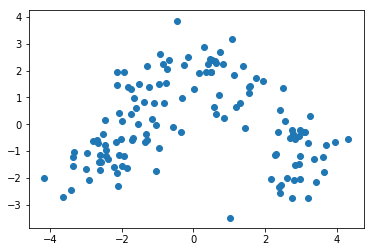

In [ ]:
plt.scatter([x[0] for x in X_train], [x[1] for x in X_train])
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  0,  0],
       [ 1, 18,  0],
       [ 0,  0, 13]])

In [ ]:
clf.score(X_test, y_test)

0.97777777777777775

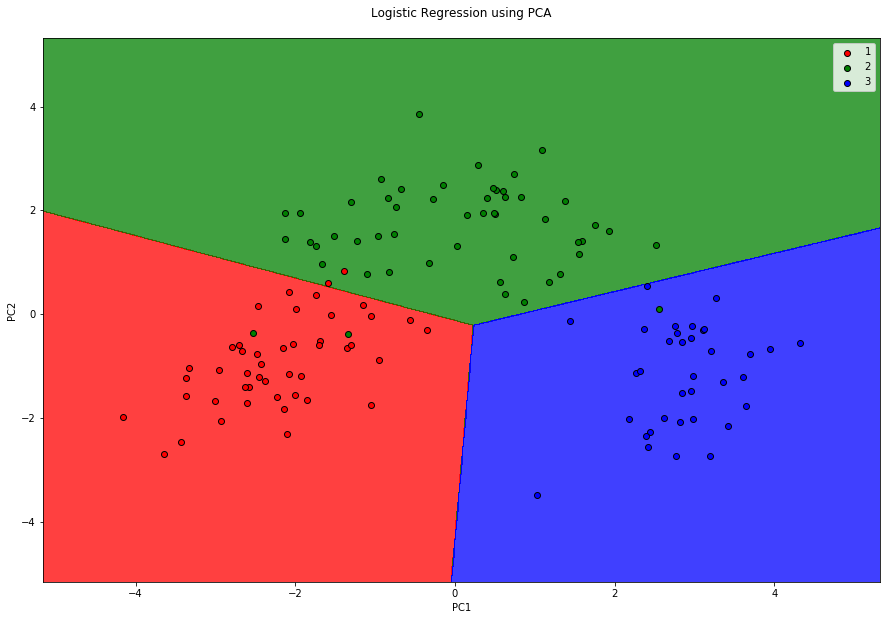

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
fig = plt.figure(figsize=(15, 10))
# generates every pixel in the table. MeshGrid creates one entry for every point from X1 to X2
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01))
# classifies every pixel as 0 or 1
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green', 'blue'))(i), label=j, edgecolor='black')
plt.xlim(X1.min(), X1.max())
plt.legend()
plt.ylim(X2.min(), X2.max())
plt.title('Logistic Regression using PCA\n')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()